Tip: hit shift-enter after each Python statement to run it

In [25]:
import pandas
from sklearn import svm
from sklearn import tree
import graphviz

Read data from csv file. Just print "raw_data" to see what is inside.

Q: Can you spot the relationship between a number and the class?

In [2]:
raw_data = pandas.read_csv('/rodata/exercise01/part2.csv', index_col=None)

raw_data has multiple numbers and a class. The goal is that our ML can learn the class for the numbers.

For that, we need to split them. Class goes into one array, the data to learn (a.k.a. "features" in another)

In [3]:
learn_data = raw_data.copy()
classes = raw_data['class']
del learn_data['class']

In [5]:
learn_data.head(5)

,number1,number2,number3,number4,number5,number6,number7,number8
0,0,0,0,0,0,0,0,23
1,0,0,0,0,0,0,0,54
2,0,0,0,0,0,0,0,36
3,0,0,0,0,0,0,0,60
4,0,0,0,0,0,0,0,62


We use a Support Vector Classifier

In [12]:
classifier = svm.SVC(kernel ='linear')

Tell the classifier to learn based on reference data

In [14]:
classifier.fit(learn_data.values, classes)

SVC(kernel='linear')

Q: How good are the predictions of numbers between 1 and 100? Do they match your finding of the relationship?

In [8]:
classifier.predict([ [0,0,0,0,0,0,0,99] ])

array([1])

In [15]:
# try some random number
classifier.predict([ [10,0,0,10,0,10,0,99] ])

array([1])

In [16]:
# try some random number
classifier.predict([ [10,100,100,10,10,10,100,150] ])

array([1])

##### we can try a variance selection of features using varianceThreshold 

In [22]:
from sklearn.feature_selection import VarianceThreshold
# Create thresholder
thresholder = VarianceThreshold(threshold=0.5)

# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(learn_data)

# View high variance feature matrix
# View variances
thresholder.fit(learn_data).variances_

array([  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      , 837.701775])

[Text(0.5, 0.75, 'number8 <= 50.5\nentropy = 0.999\nsamples = 1000\nvalue = [517, 483]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 517\nvalue = [517, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 483\nvalue = [0, 483]')]

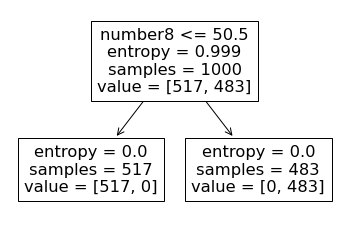

In [27]:
# only the last feature has a significant varaince

classifier_dt = tree.DecisionTreeClassifier(criterion= 'entropy')
classifier_dt.fit(learn_data.values, classes)
tree.plot_tree(classifier_dt, 
               feature_names=learn_data.columns)



##### Only takes into account column #8